# Image Gradients

### Gradients highlight edges in an image by detecting intensity changes.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
path = "../All_data_sets/dataset"

In [3]:
os.listdir(path)

['.ipynb_checkpoints',
 'dog_1.jpeg',
 'dog_2.jpeg',
 'dog_3.jpg',
 'dog_4.jpg',
 'mb_1.jpeg',
 'mb_2.jpeg',
 'pichuka_1.jpeg',
 'pichuka_2.jpeg',
 'pichuka_3.jpeg']

In [4]:
image = cv2.imread( path+'/mb_2.jpeg' )

In [5]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Sobel X (detects vertical edges)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)

# Sobel Y (detects horizontal edges)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)

# Laplacian (detects edges in all directions)
laplacian = cv2.Laplacian(gray, cv2.CV_64F)

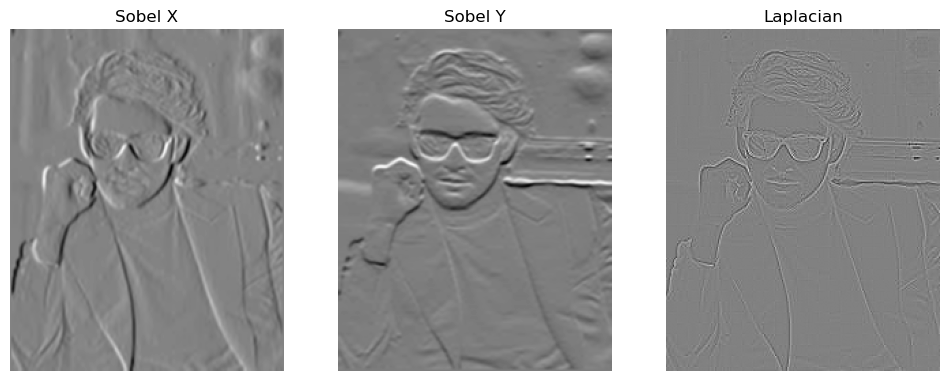

In [6]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1), plt.imshow(sobelx, cmap='gray'), plt.title("Sobel X"), plt.axis('off')
plt.subplot(1,3,2), plt.imshow(sobely, cmap='gray'), plt.title("Sobel Y"), plt.axis('off')
plt.subplot(1,3,3), plt.imshow(laplacian, cmap='gray'), plt.title("Laplacian"), plt.axis('off')
plt.show()

# Morphological Operations

## These are applied on binary images (thresholded) to remove noise, close gaps, or enhance structures.

In [7]:
# Convert to binary (thresholding)
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Define kernel (shape for morph operations)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

# Erosion (shrinks white areas, removes noise)
erosion = cv2.erode(binary, kernel, iterations=1)

# Dilation (expands white areas, fills gaps)
dilation = cv2.dilate(binary, kernel, iterations=1)

# Opening (erosion → dilation) removes noise
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# Closing (dilation → erosion) fills holes
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

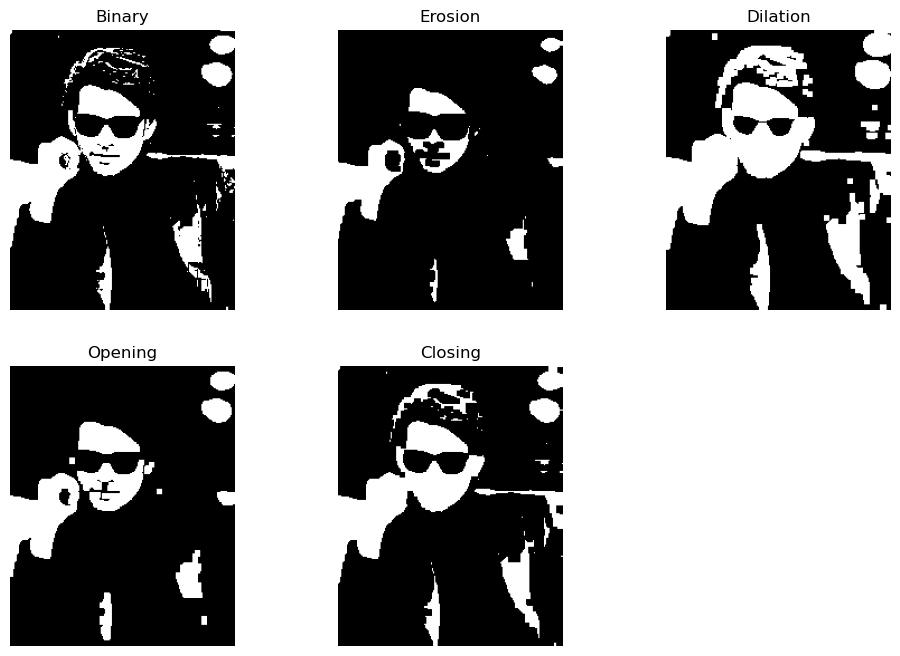

In [8]:
plt.figure(figsize=(12,8))
plt.subplot(2,3,1), plt.imshow(binary, cmap='gray'), plt.title("Binary"), plt.axis('off')
plt.subplot(2,3,2), plt.imshow(erosion, cmap='gray'), plt.title("Erosion"), plt.axis('off')
plt.subplot(2,3,3), plt.imshow(dilation, cmap='gray'), plt.title("Dilation"), plt.axis('off')
plt.subplot(2,3,4), plt.imshow(opening, cmap='gray'), plt.title("Opening"), plt.axis('off')
plt.subplot(2,3,5), plt.imshow(closing, cmap='gray'), plt.title("Closing"), plt.axis('off')
plt.show()

## Erosion shrinks objects

## Dilation enlarges them

## Opening removes small white noise

## Closing fills small black holes inside objects

# Blurring & Smoothing

## Averaging Blur

## Each pixel value is replaced by the average of its neighbors.

In [9]:
blur_avg = cv2.blur(image, (5,5))

## Gaussian Blur

## Uses a weighted kernel (more natural blur).

In [11]:
blur_gaussian = cv2.GaussianBlur(image, (5,5), 0)

## Median Blur

## Great for removing salt & pepper noise.

In [12]:
blur_median = cv2.medianBlur(image, 5)


## Bilateral Filter

## Reduces noise but keeps edges sharp (very useful in vision tasks).

In [13]:
blur_bilateral = cv2.bilateralFilter(image, 9, 75, 75)


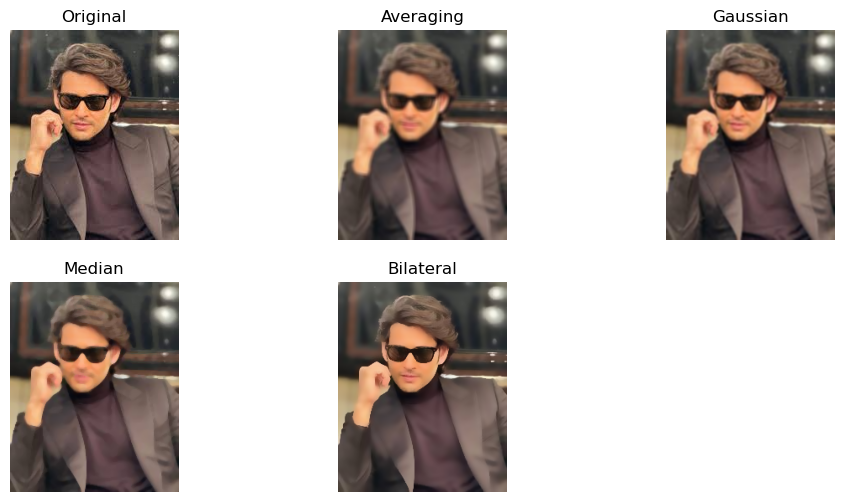

In [14]:
titles = ["Original", "Averaging", "Gaussian", "Median", "Bilateral"]
images = [image, blur_avg, blur_gaussian, blur_median, blur_bilateral]

plt.figure(figsize=(12,6))
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.show()